In [15]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_c14_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [16]:
data

['t_n103        47.2641 (40.8910, 54.0807) (40.8058, 53.9791) 13.1733 (Jnode 202)\n',
 't_n104        40.8310 (33.7258, 48.4884) (33.6008, 48.3350) 14.7342 (Jnode 201)\n',
 't_n105        39.1124 (32.2870, 46.4749) (32.1236, 46.2941) 14.1704 (Jnode 200)\n',
 't_n106        35.2923 (29.0831, 42.0175) (28.9320, 41.8348) 12.9028 (Jnode 199)\n',
 't_n107        34.1286 (28.1175, 40.6544) (28.0158, 40.5307) 12.5148 (Jnode 198)\n',
 't_n108        32.0622 (26.3886, 38.2383) (26.1997, 38.0328) 11.8331 (Jnode 197)\n',
 't_n109        17.8617 (14.2674, 21.8209) (14.1244, 21.6619)  7.5376 (Jnode 196)\n',
 't_n110        17.6926 (14.1276, 21.6213) (14.0296, 21.5031)  7.4735 (Jnode 195)\n',
 't_n111        17.1281 (13.6659, 20.9484) (13.6026, 20.8634)  7.2608 (Jnode 194)\n',
 't_n112        16.4170 (13.0876, 20.0853) (13.0295, 20.0167)  6.9872 (Jnode 193)\n',
 't_n113        15.7660 (12.5575, 19.3086) (12.4424, 19.1852)  6.7429 (Jnode 192)\n',
 't_n114        11.7790 ( 9.1902, 14.6881) ( 9.0861, 1

In [17]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [18]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [19]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [20]:
posterior_mean_iqtree

[47.2641,
 40.831,
 39.1124,
 35.2923,
 34.1286,
 32.0622,
 17.8617,
 17.6926,
 17.1281,
 16.417,
 15.766,
 11.779,
 8.6018,
 6.5354,
 3.5704,
 12.328,
 10.3911,
 16.4394,
 10.7448,
 15.7406,
 12.5643,
 10.2056,
 9.039,
 15.2625,
 14.2652,
 4.1228,
 16.8981,
 15.2301,
 11.8613,
 9.4598,
 11.0512,
 9.9976,
 8.3698,
 8.6074,
 29.7336,
 24.2144,
 32.3913,
 29.4283,
 26.9948,
 22.17,
 12.0185,
 21.665,
 18.6523,
 16.4769,
 13.7968,
 26.6845,
 24.4167,
 6.8461,
 3.1599,
 36.2185,
 33.8254,
 30.1181,
 29.445,
 31.5953,
 20.8854,
 26.1542,
 20.2934,
 39.622,
 37.1007,
 33.5744,
 31.2412,
 26.6216,
 18.1212,
 23.2391,
 32.6773,
 11.7231,
 32.9291,
 23.0248,
 22.0273,
 21.1359,
 19.8708,
 18.2382,
 17.3281,
 16.5291,
 15.6162,
 13.8152,
 11.8645,
 9.8193,
 13.9372,
 13.0588,
 10.3965,
 11.4994,
 15.494,
 14.2498,
 13.0428,
 11.3523,
 8.1851,
 14.4384,
 12.968,
 11.2796,
 17.1509,
 16.1821,
 14.9691,
 13.1415,
 9.4078,
 15.0705,
 10.4773,
 8.3407,
 3.2099,
 22.3174,
 19.0197]

In [21]:
lower_ci_iqtree

[]

In [22]:
upper_ci_iqtree

[]

In [23]:
file_LG = open("LG_c14_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [25]:
posterior_mean_baseml

[47.3627,
 40.8893,
 38.758,
 34.7598,
 33.4112,
 30.5391,
 17.1345,
 16.9064,
 16.0737,
 15.2352,
 14.3994,
 10.6863,
 7.7511,
 5.7073,
 3.271,
 11.1556,
 9.1843,
 15.1892,
 9.8955,
 14.3771,
 11.3442,
 9.0158,
 8.3418,
 14.1064,
 13.0205,
 4.1531,
 15.9357,
 14.1525,
 10.9444,
 8.659,
 10.2028,
 9.0417,
 7.4066,
 8.1564,
 28.1753,
 23.1442,
 31.3409,
 28.1222,
 25.3486,
 20.5468,
 11.3488,
 20.249,
 17.0528,
 14.6443,
 12.0199,
 25.5057,
 23.0338,
 7.4603,
 3.4281,
 34.898,
 31.748,
 27.5078,
 26.9665,
 30.0411,
 20.0281,
 24.5477,
 18.6041,
 39.4014,
 36.5372,
 32.4914,
 29.8053,
 25.2169,
 17.7509,
 21.6337,
 31.7666,
 12.0424,
 32.3629,
 24.4233,
 23.0041,
 21.7645,
 20.2672,
 18.2934,
 17.1799,
 16.2056,
 14.984,
 12.9382,
 10.8895,
 8.9811,
 13.2569,
 12.2368,
 9.5824,
 10.4527,
 14.9568,
 13.4823,
 12.1091,
 10.3265,
 7.4216,
 13.604,
 12.0421,
 10.3167,
 16.8332,
 15.478,
 14.0784,
 12.0567,
 8.4688,
 14.5405,
 10.4829,
 8.1273,
 3.251,
 23.4012,
 19.8423]

In [26]:
posterior_mean_iqtree

[47.2641,
 40.831,
 39.1124,
 35.2923,
 34.1286,
 32.0622,
 17.8617,
 17.6926,
 17.1281,
 16.417,
 15.766,
 11.779,
 8.6018,
 6.5354,
 3.5704,
 12.328,
 10.3911,
 16.4394,
 10.7448,
 15.7406,
 12.5643,
 10.2056,
 9.039,
 15.2625,
 14.2652,
 4.1228,
 16.8981,
 15.2301,
 11.8613,
 9.4598,
 11.0512,
 9.9976,
 8.3698,
 8.6074,
 29.7336,
 24.2144,
 32.3913,
 29.4283,
 26.9948,
 22.17,
 12.0185,
 21.665,
 18.6523,
 16.4769,
 13.7968,
 26.6845,
 24.4167,
 6.8461,
 3.1599,
 36.2185,
 33.8254,
 30.1181,
 29.445,
 31.5953,
 20.8854,
 26.1542,
 20.2934,
 39.622,
 37.1007,
 33.5744,
 31.2412,
 26.6216,
 18.1212,
 23.2391,
 32.6773,
 11.7231,
 32.9291,
 23.0248,
 22.0273,
 21.1359,
 19.8708,
 18.2382,
 17.3281,
 16.5291,
 15.6162,
 13.8152,
 11.8645,
 9.8193,
 13.9372,
 13.0588,
 10.3965,
 11.4994,
 15.494,
 14.2498,
 13.0428,
 11.3523,
 8.1851,
 14.4384,
 12.968,
 11.2796,
 17.1509,
 16.1821,
 14.9691,
 13.1415,
 9.4078,
 15.0705,
 10.4773,
 8.3407,
 3.2099,
 22.3174,
 19.0197]

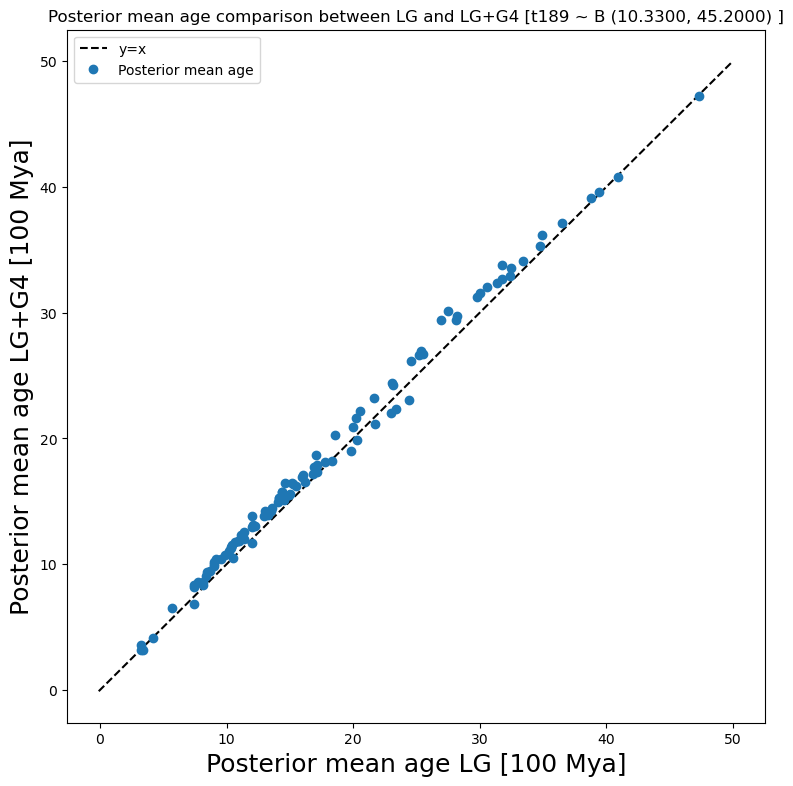

In [27]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [t189 ~ B (10.3300, 45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c14_scatter.png')

In [28]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')